In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import cm

In [63]:
nx = 41
ny = 41
l = 1.
h = 1.
dx = l/(nx-1)
dy = h/(ny-1)
l1_target = 1e-6
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)
psi0 = numpy.zeros((ny,nx))
w0 = numpy.zeros((ny,nx))
utop = 1
uleft = 0
uright = 0
ubottom = 0
d = dx

In [64]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [65]:
def mylaplacepoisson_nest(psi, w, l1_target):
    
    iterations = 0
    normw = l1_target+1 #init normw to be larger than l1_target
    normpsi = l1_target+1 #init normpsi to be larger than l1_target
   
    while (normw > l1_target or normpsi > l1_target): #à priori qd w converge, psi cvg
        
        w_n = w.copy()
        psi_n = psi.copy()
        
        
        w[1:-1,1:-1] = .25 * (w_n[1:-1,:-2] + w_n[1:-1,2:] + w_n[:-2,1:-1] + w_n[2:,1:-1])
        
        psi[1:-1,1:-1] = .25 * ((psi_n[1:-1,2:] + psi_n[1:-1,:-2] +\
                        psi_n[2:,1:-1] + psi_n[:-2,1:-1]) + w[1:-1,1:-1]*d**2)
       
        #Neumann 2nd-order BC
       
        
        #psi[:,0] = 0
        #psi[:,-1] = 0
        w[:,0] = ((-1/(2*d**2)) * (8*psi_n[:,1] - psi_n[:,2] )) + 3*uleft/d
        w[:,-1] = ((-1/(2*d**2)) * (8*psi_n[:,-2] - psi_n[:,-3] )) - 3*uright/d
       
        #psi[0,:] = 0
        #psi[-1,:] = 0
        w[0,:] = ((-1/(2*d**2)) * (8*psi_n[1,:] - psi_n[2,:] )) + 3*ubottom/d
        w[-1,:] = ((-1/(2*d**2)) * (8*psi_n[-2,:] - psi_n[-3,:] )) - 3*utop/d #7*psi pas dans l'énoncé?????
            
        normw =  L1norm(w_n, w)
    
        normpsi = L1norm(psi_n, psi)
        
    
        iterations += 1
        
    return psi, w, iterations, normw, normpsi

In [66]:
psi, w, iterations, normw, normpsi = mylaplacepoisson_nest(psi0, w0, l1_target)

In [77]:
print (psi[:])

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.41429633e-06   2.17360371e-06 ...,   2.17360371e-06
    1.41429633e-06   0.00000000e+00]
 [  0.00000000e+00   2.20482439e-06   1.45898816e-07 ...,   1.45898816e-07
    2.20482439e-06   0.00000000e+00]
 ..., 
 [  0.00000000e+00  -6.35061518e-03  -1.52288240e-02 ...,  -1.52288240e-02
   -6.35061518e-03   0.00000000e+00]
 [  0.00000000e+00  -7.32622358e-03  -1.33638594e-02 ...,  -1.33638594e-02
   -7.32622358e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [68]:
print(iterations, normw, normpsi)

4060 9.99748579551e-07 2.22733131185e-08


In [60]:
%%timeit
mylaplacepoisson_nest(psi0, w0, l1_target)

1000 loops, best of 3: 281 µs per loop


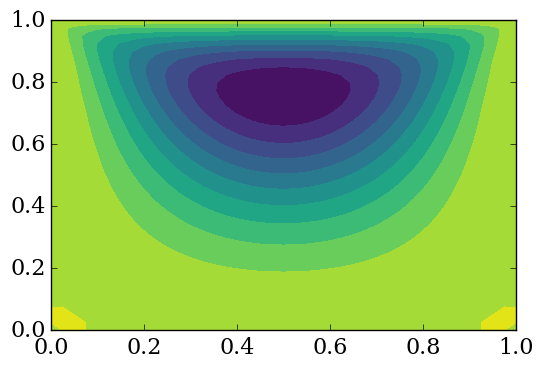

In [69]:
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)

In [82]:
print ((numpy.max(numpy.abs(psi[1:-1,1:-1]))),numpy.max(numpy.abs(psi[:])))

0.0998451724383 0.0998451724383


In [83]:
print ((numpy.max(numpy.abs(w[1:-1,1:-1]))),numpy.max(numpy.abs(w[:])))

22.5607771651 120.0


In [46]:
numpy.round(psi[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

In [7]:
#byebye
def mylaplacepoisson(psi, w, l1_target):
    
    iterations = 0
    normw = l1_target+1 #init normw to be larger than l1_target
    normpsi = l1_target+1 #init normpsi to be larger than l1_target
   
    while (normw > l1_target): #à priori qd w converge, psi cvg
        
        w_n = w.copy()
        psi_n = psi.copy()
        
        
        for j in range (1,ny-1):
            for i in range (1,nx-1):
                w[j,i] = .25 * (w_n[j,i-1] + w_n[j,i+1] + w_n[j-1,i] + w_n[j+1,i])
                psi[j,i] = 1/(2*(dx**2 + dy**2)) * \
                        ((psi_n[j,i+1] + psi_n[j,i-1])*dy**2 +\
                        (psi_n[j+1,i] + psi_n[j-1,i])*dx**2 +\
                         w[j,i]*dx**2*dy**2)
        #Neumann 2nd-order BC
       
        for j in range (ny):
            psi[j,0] = 0
            psi[j,-1] = 0
            w[j,0] = ((-1/(2*dx**2)) * (8*psi_n[j,1] - psi_n[j,2] )) + 3*uleft/dx
            w[j,-1] = ((-1/(2*dx**2)) * (8*psi_n[j,-2] - psi_n[j,-3] )) - 3*uright/dx
        for i in range(nx):
            psi[0,i] = 0
            psi[-1,i] = 0
            w[0,i] = ((-1/(2*dy**2)) * (8*psi_n[1,i] - psi_n[2,i] )) + 3*ubottom/dx
            w[-1,i] = ((-1/(2*dy**2)) * (8*psi_n[-2,i] - psi_n[-3,i] )) - 3*utop/dy #7*psi pas dans l'énoncé?????
            
        normw =  L1norm(w_n, w)
    
        normpsi = L1norm(psi_n, psi)
        
    
        iterations += 1
       
        
    return psi, w, iterations, normw, normpsi

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(x, y, psi):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    psi: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,psi[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)